<a href="https://colab.research.google.com/github/iobis/pyobis/blob/main/notebooks/depth_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Species Depth - A time series analysis
Climate Change and global warming has forced animals and plants globally to shift their habitats. Marine organisms are one of the most hit due to oceans becoming warmer. Increased sea temperatures have forced changes in depth. At a glance change in depth with time can be categorized into:
+ Conservatism i.e. no change in depth.
+ Shift, where the minimal and maximal depth change with the same amount.
+ Compression, where the maximal depth remains nearly constant but minimal depth shrinks significantly.
+ Expansion, where the maximal depth shifts significantly downwards while minimal depth remains nearly constant.

The [Ocean Biodiversity Information System (OBIS)](https://obis.org/) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.



In this notebook we will utilise `pyobis` to fetch OBIS occurrence records. Let us install `pyobis` first.

# Installing pyobis

In [1]:
try:
  import pyobis
except:
  %pip install -q git+https://github.com/iobis/pyobis.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


Importing other modules

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pyobis.occurrences import OccQuery
occ = OccQuery()
%matplotlib inline
import numpy as np

# Grabbing Data

Let us get started by grabbing some data for *Mola mola* (Ocean Sunfish). We will then draw a depth time-series analysis plot.

In [3]:
# since we want to do analysis with depth we want only those records which have depth records. for this we set startdepth to zero.
res = occ.search(taxonid=127405, startdepth=-1.0)["results"]
df = pd.DataFrame(res)
df

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 280/280
Fetched 280 records.


,rightsHolder,infraphylum,date_year,institutionID,scientificNameID,year,scientificName,dropped,gigaclassid,fieldNumber,...,georeferenceVerificationStatus,accessRights,organismQuantity,organismQuantityType,preparations,associatedMedia,georeferenceSources,county,islandGroup,typeStatus
0,The Huntsman Marine Science Centre and Fisheri...,Gnathostomata,2013.0,ARC,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,Z29760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gnathostomata,2013.0,NaN,urn:lsid:marinespecies.org:taxname:127405,2013,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Gnathostomata,2010.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Gnathostomata,2011.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"'Her Majesty the Queen in right of Canada, as ...",Gnathostomata,2007.0,NaN,urn:lsid:marinespecies.org:taxname:127405,01,Mola mola,False,10194,RAMM-2007-ew04-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Gnathostomata,2012.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,Gnathostomata,2012.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,Gnathostomata,2004.0,NaN,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,NaN,Gnathostomata,2013.0,8c116cac-9394-4c4e-be14-06184bdc62bd,urn:lsid:marinespecies.org:taxname:127405,NaN,Mola mola,False,10194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[["depth","waterBody", "vernacularName","organismQuantity","marine","continent", "year"]]

,depth,waterBody,vernacularName,organismQuantity,marine,continent,year
0,0.00,NaN,NaN,NaN,True,NaN,2013
1,10.05,NaN,NaN,NaN,True,NaN,2013
2,0.00,Atlantic Ocean,ocean sunfish,NaN,True,North America,NaN
3,0.00,Atlantic Ocean,ocean sunfish,NaN,True,North America,NaN
4,0.00,NaN,NaN,NaN,True,NaN,01
...,...,...,...,...,...,...,...
275,0.00,Cape Cod Bay,ocean sunfish,NaN,True,North America,NaN
276,0.00,Cape Cod Bay,ocean sunfish,NaN,True,North America,NaN
277,400.00,NaN,NaN,NaN,True,NaN,NaN
278,0.00,Butler Cove,ocean sunfish,NaN,True,North America,NaN


Let's plot a line plot with depthinmeters v/s year. For this let us collect our data first. We want records only where both `depth` and `year` fields are non-empty.

In [5]:
timeDF = df[df["year"].notnull() & df["depth"].notnull()][["depth","year"]]

Let us now look at the `year` values and clean the data.

In [6]:
timeDF = timeDF[timeDF["year"].notna()]

In [7]:
timeDF.year.unique()

array(['2013', '01', '1995', '2010', '2018', '2015', '2003', '2019',
       '2007', '2002', '1982', '2004', '1983', '2005', '2012', '31',
       '2017', '21', '22', '2009', '2008', '1992', '1977', '1986', '05',
       '1990', '1997', '1993', '2014', '14', '2011', '2006', '18', '15',
       '02', '1998', '1981', '1965', '1999', '1996', '2016', '1991',
       '1964', '03', '26', '1975', '06', '1987', '1994', '1972', '2001'],
      dtype=object)

We can see some year values are just two digits, we cannot definitely say which century it was 19th, 20th or 21st - who knows? So let us do a workaround to get the real values. We will find the corresponding `eventDate` from the original DataFrame and pick the year part from it.

In [8]:
timeDF["year"] = timeDF["year"].astype(int) # first changing to int data type to ease comparison
newYears = df.loc[timeDF[timeDF["year"].isin([1,5,6,31,21,22,14,18,15,2,3,26])].index,"eventDate"].str[:4] # getting only specific values
timeDF.loc[newYears.index,"year"] = newYears.astype(int) # replacing with the new year value
timeDF.loc[newYears.index,"year"] # let us see what we did

4      2007
39     2006
41     2008
43     2005
59     2003
60     1999
80     2002
99     1997
104    2009
106    2007
107    1992
133    1997
144    1999
146    2003
208    2006
228    1995
237    1999
Name: year, dtype: int64

Whoa, great! Now that we have updated the year values let us plot the time series analysis plot.

In [9]:
sns.set(rc = {'figure.figsize':(15,10)})

In [10]:
timeDF.min()

depth       0.0
year     1964.0
dtype: float64

But before we move onto plotting a time-series plot for species depth let us first visualize how depth records are distributed over the years.

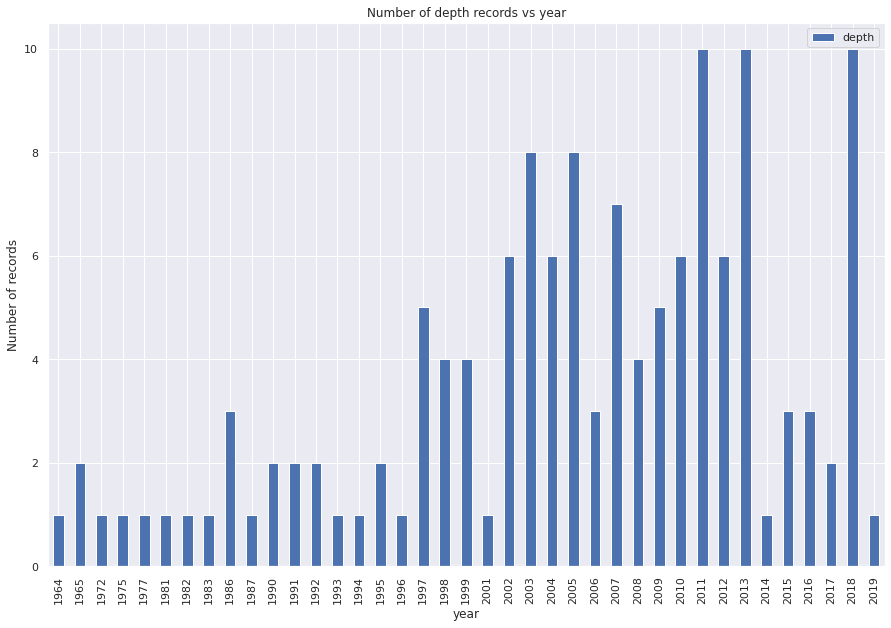

In [11]:
timeDF.groupby("year").count().plot.bar()
plt.ylabel("Number of records")
plt.title("Number of depth records vs year");

Its evident that there is a huge variation in the number of records over these years. 2011, 2013 and 2018 have got high amount of records but the years in between them have much less records. This high variation might add up unnecessary noise to our analysis and we might not be able to strongly conclude a trend.

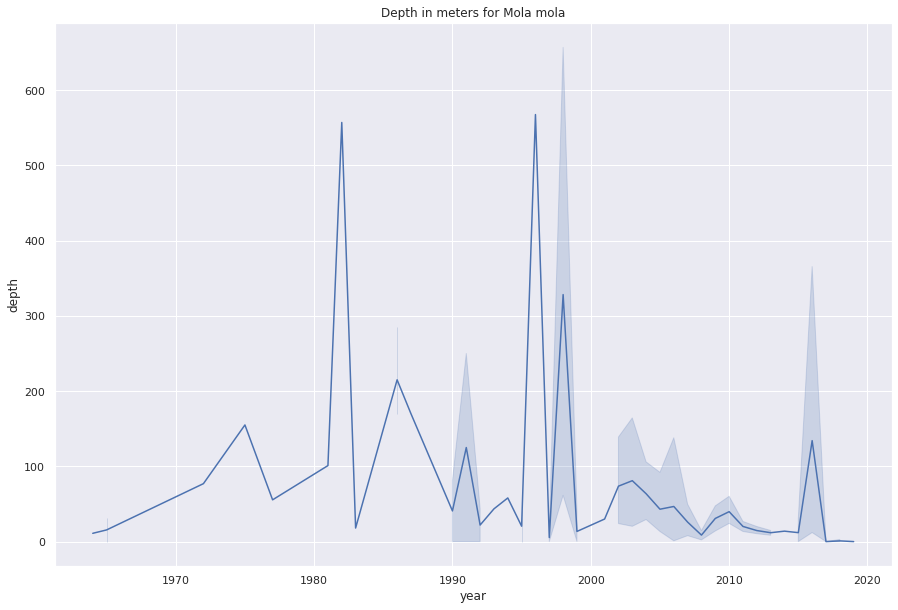

In [12]:
sns.set_style("darkgrid")
p = sns.lineplot(x = timeDF["year"],y = timeDF["depth"])
p.set_title("Depth in meters for Mola mola");

Let us also add a rolling average to this plot.

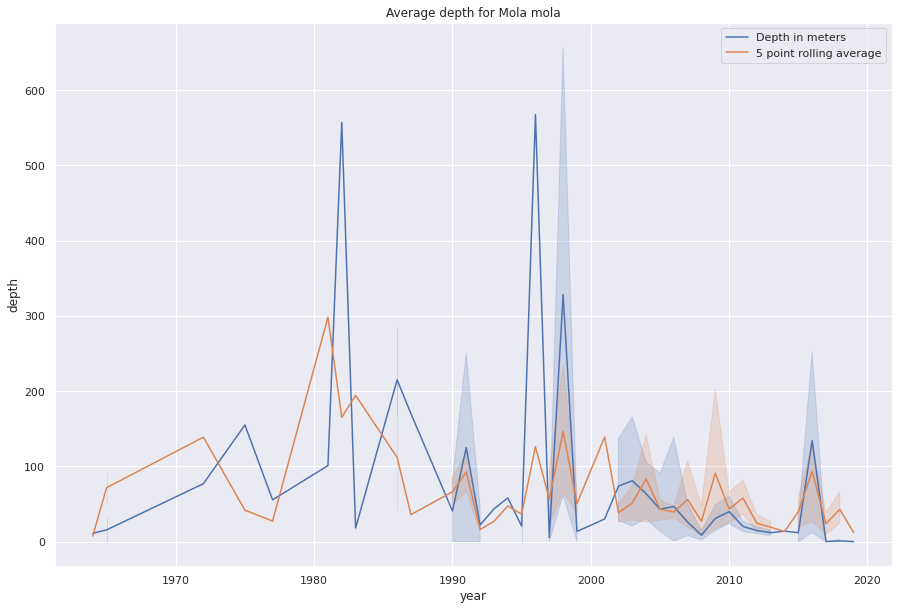

In [13]:
sns.set_style("darkgrid")
p = sns.lineplot(x = timeDF[timeDF["year"]>1900]["year"],y = timeDF[timeDF["year"]>1900]["depth"], label="Depth in meters")
sns.lineplot(x = timeDF[timeDF["year"]>1900]["year"], y = timeDF.depth.rolling(5).mean(), label="5 point rolling average")
p.legend()
p.set_title("Average depth for Mola mola");

We can clearly see that as time has passed, the average depth in meters has decreased significantly. This is also alarming because there is a drastic change in average depth over the years. However, since many records have missing `depth` parameter out of 20,972 occurrence records for *Mola mola* only 274 records had a `depth` entry. So this might not be the complete picture.

### Other species: How are they doing?

We saw how the change in average depth has been recorded for *Mola mola*, let us know study how other marine species are doing. So we pick up some species each from:
+ dolphins (and porpoises)
+ turtles
+ tuna
+ whale

Let us first define the species, and grab the data. Fasten your seatbelts, we we'll be going on long drive!

In [14]:
species = [
           'Tursiops truncatus', # common bottlenose dolphin
           'Orcinus orca', # killer whale - orca
           'Tursiops aduncus', # Indo-Pacific bottlenose dolphin
           'Inia geoffrensis', # amazon river dolphin
           'Cheloniidae', # sea turtles
           'Dermochelyidae families', # sea turtles
           'Eretmochelys imbricata', # hawksbill sea turtle
           'Dermochelys coriacea', # leatherback sea turtle
           'Thunnus', # tuna
           'Katsuwonus', # tuna
           'Rhincodon typus', # whale shark
           'Lepomis gibbosus', # pumpkinseed (a sunfish)
]

We will now check whether they have any records or not.

In [15]:
hasRecords=[]
for j in species:
  data = occ.search(scientificname=j,size=1)
  if(data["total"]>0):
    hasRecords.append(j)
    print("{} Records found for {}".format(data["total"],j))

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 1/1
Fetched 1 records.
78303 Records found for Tursiops truncatus

Fetched 1 records.
11631 Records found for Orcinus orca

Fetched 1 records.
3208 Records found for Tursiops aduncus

Fetched 1 records.
1 Records found for Inia geoffrensis

Fetched 1 records.
338203 Records found for Cheloniidae

Fetched 1 records.

Fetched 1 records.
12335 Records found for Eretmochelys imbricata

Fetched 1 records.
21326 Records found for Dermochelys coriacea

Fetched 1 records.
519267 Records found for Thunnus

Fetched 1 records.
105139 Records found for Katsuwonus

Fetched 1 records.
10353 Records found for Rhincodon typus

Fetched 1 records.
9055 Records found for Lepomis gibbosus


That's really a huge amount of records, but *Inia geoffrensis* has got only 1 record, so we'll drop it.

In [16]:
hasRecords.remove('Inia geoffrensis')

In [17]:
hasRecords

['Tursiops truncatus',
 'Orcinus orca',
 'Tursiops aduncus',
 'Cheloniidae',
 'Eretmochelys imbricata',
 'Dermochelys coriacea',
 'Thunnus',
 'Katsuwonus',
 'Rhincodon typus',
 'Lepomis gibbosus']

Now let us grab depth data for these species.

In [18]:
res = occ.search(scientificname=hasRecords, startdepth=-1.0)["results"]
data = pd.DataFrame(res)
data


Fetched 401572 records.


,infraphylum,date_year,scientificNameID,scientificName,individualCount,dropped,gigaclassid,aphiaID,decimalLatitude,subclassid,...,associatedSequences,higherClassification,nomenclaturalCode,georeferenceVerificationStatus,organismScope,acceptedNameUsage,locationAccordingTo,identificationVerificationStatus,verbatimSRS,organismRemarks
0,Gnathostomata,1998.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,4,False,10194.0,127027,26.500000,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,2013.0,urn:lsid:marinespecies.org:taxname:137206,Chelonia mydas,NaN,False,NaN,137206,-23.780000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,NaN,urn:lsid:marinespecies.org:taxname:127028,Thunnus obesus,NaN,False,10194.0,127028,26.964172,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,2000.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,2,False,10194.0,127027,33.330000,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,2009.0,urn:lsid:marinespecies.org:taxname:137207,Eretmochelys imbricata,1,False,NaN,137207,-13.600400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401567,Gnathostomata,2001.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,8,False,10194.0,127027,38.260000,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401568,Gnathostomata,1993.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,NaN,False,10194.0,127027,26.858334,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401569,Gnathostomata,1993.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,6,False,10194.0,127027,32.000000,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401570,Gnathostomata,1992.0,urn:lsid:marinespecies.org:taxname:127027,Thunnus albacares,NaN,False,10194.0,127027,39.158335,293496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That's a huge data! 395,570 rows of data. Let's plot a combined plot of all the species. But first let us see which species are there.

In [19]:
data.scientificName.unique()

array(['Thunnus albacares', 'Chelonia mydas', 'Thunnus obesus',
       'Eretmochelys imbricata', 'Thunnus alalunga', 'Thunnus atlanticus',
       'Lepidochelys olivacea', 'Thunnus thynnus', 'Caretta caretta',
       'Katsuwonus pelamis', 'Lepomis gibbosus', 'Dermochelys coriacea',
       'Thunnus maccoyii', 'Orcinus orca', 'Lepidochelys kempii',
       'Rhincodon typus', 'Thunnus', 'Tursiops truncatus',
       'Natator depressa', 'Tursiops truncatus ponticus',
       'Tursiops aduncus', 'Thunnus orientalis', 'Thunnus tonggol',
       'Cheloniidae', 'Caretta', 'Eretmochelys', 'Thunnus maculata',
       'Chelonia', 'Eretmochelys imbricata bissa'], dtype=object)

In [20]:
print("There are {} species in the data.".format(len(data.scientificName.unique())))

There are 29 species in the data.


Now let us get not null entries for years.

In [21]:
dataDeriv = data[data["year"].notnull()]
allY=np.linspace(dataDeriv.year.unique().astype(int).min(), dataDeriv.year.unique().astype(int).max(),7)
allY = allY.astype(int)

In [22]:
allY

array([1886, 1908, 1930, 1953, 1975, 1997, 2020])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


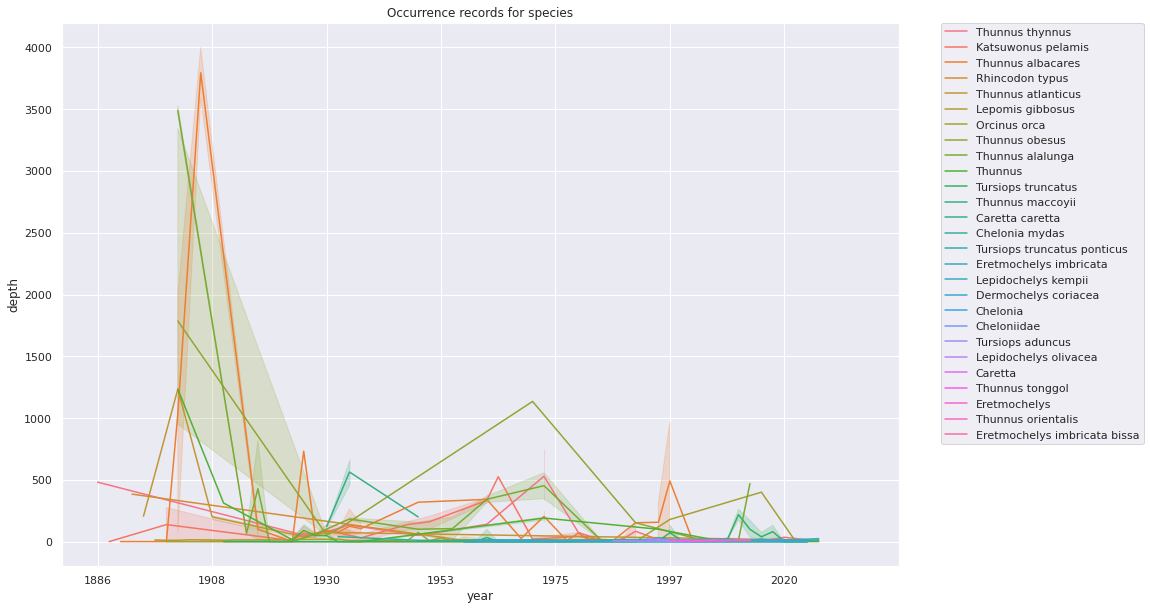

In [23]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv.sort_values(by="year", inplace=True) # we are sorting our data first
p = sns.lineplot(data = dataDeriv, x = "year", y = "depth", hue="scientificName") # we will plot different lines for different species
plt.xticks(range(0,71,10), allY) # setting a readable xaxis label
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # to avoid congestion we are shifting legend outside the graph
p.set_title("Occurrence records for species");

We can see huge variations for *Thunus albacares*

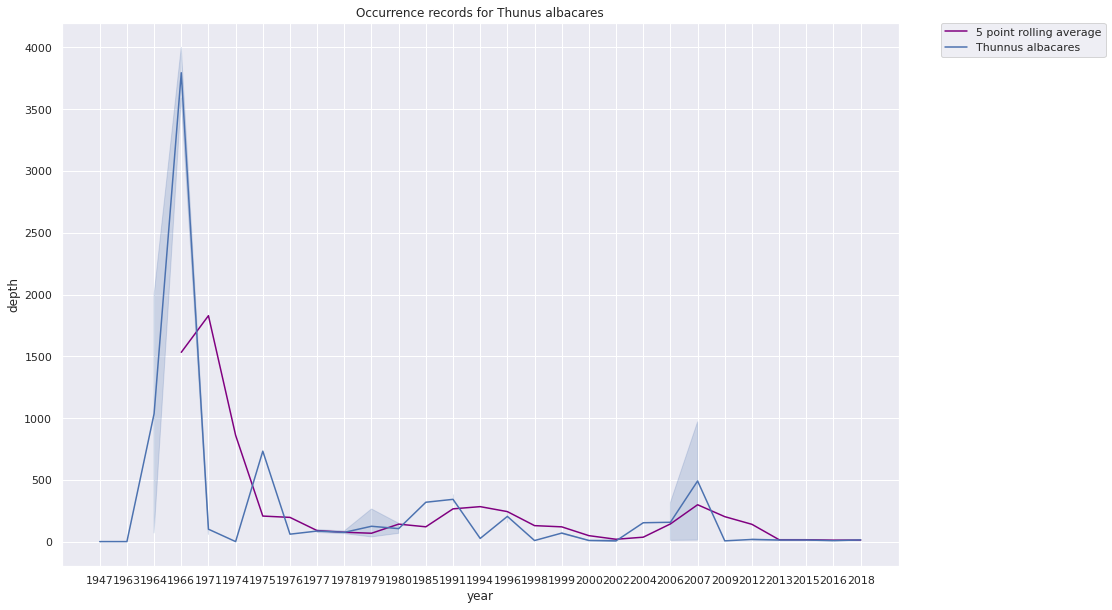

In [24]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv = dataDeriv.sort_values(by="year")
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"].year, y=dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Thunnus albacares"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_title("Occurrence records for Thunus albacares");

We can see that the average depth have fallen down significantly post 1900 for *Thunus albacares*. **This is really serious**, we must work towards conservation of this Yellowfin tuna which is also categorised as "Near threatened".



Let us visualize for *Chelonia mydas*.

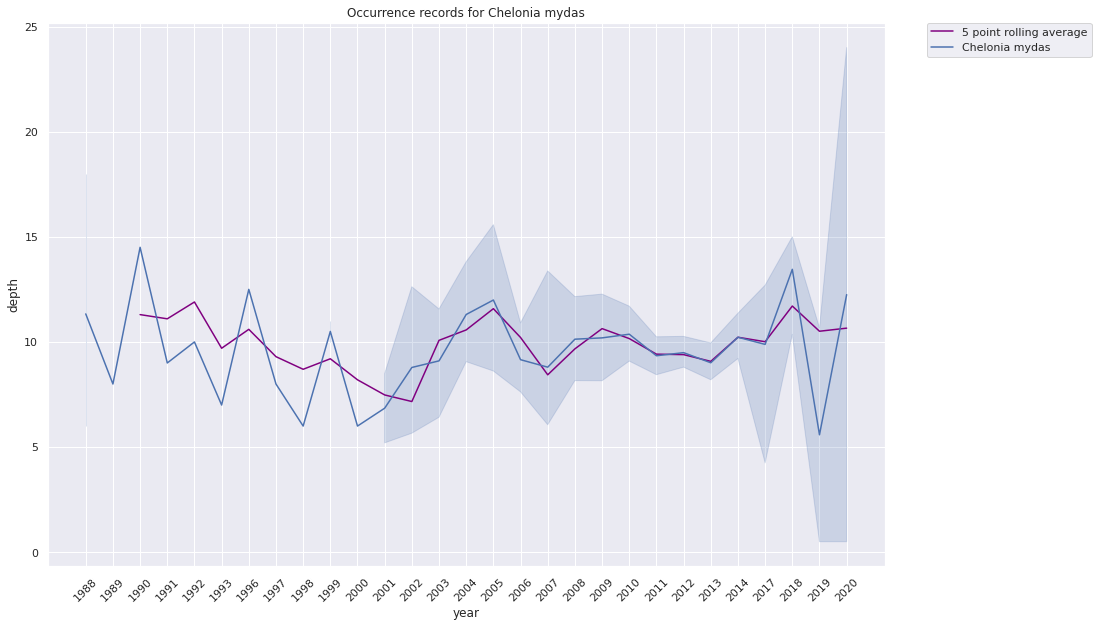

In [25]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"].year, y=dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Chelonia mydas"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
p.set_title("Occurrence records for Chelonia mydas");

This one looks something substantial, we have got significant time-series data for *Chelonia mydas*. Two major observation we can make out from this graphs are:
+ We can clearly that the species is expanding over time, both minimal and maximal depth has increased significantly over time, but the maximal depth has increased a lot more than the minimal.
+ We can see that average depth has also increased slightly over time.
+ The above two observation may point out that the species is travelling south maybe in search of cooler waters. **Global Warming is now much more than ever before.**

Now let us pick one more species which has an interesting data story behind it. For this we will drop the species which have depths more than 1500m because the spikes in the graph will distract our attention.

In [26]:
species_1500 = dataDeriv.groupby("scientificName").depth.max() # this will return a series object with indexes scientificName and max depth as its value
species_list = species_1500[species_1500<1500].index.values # print scientificNames which have max depth less than 1500
species_list

array(['Caretta', 'Caretta caretta', 'Chelonia', 'Chelonia mydas',
       'Cheloniidae', 'Dermochelys coriacea', 'Eretmochelys',
       'Eretmochelys imbricata', 'Eretmochelys imbricata bissa',
       'Katsuwonus pelamis', 'Lepidochelys kempii',
       'Lepidochelys olivacea', 'Lepomis gibbosus', 'Orcinus orca',
       'Rhincodon typus', 'Thunnus', 'Thunnus atlanticus',
       'Thunnus maccoyii', 'Thunnus orientalis', 'Thunnus thynnus',
       'Thunnus tonggol', 'Tursiops aduncus', 'Tursiops truncatus',
       'Tursiops truncatus ponticus'], dtype=object)

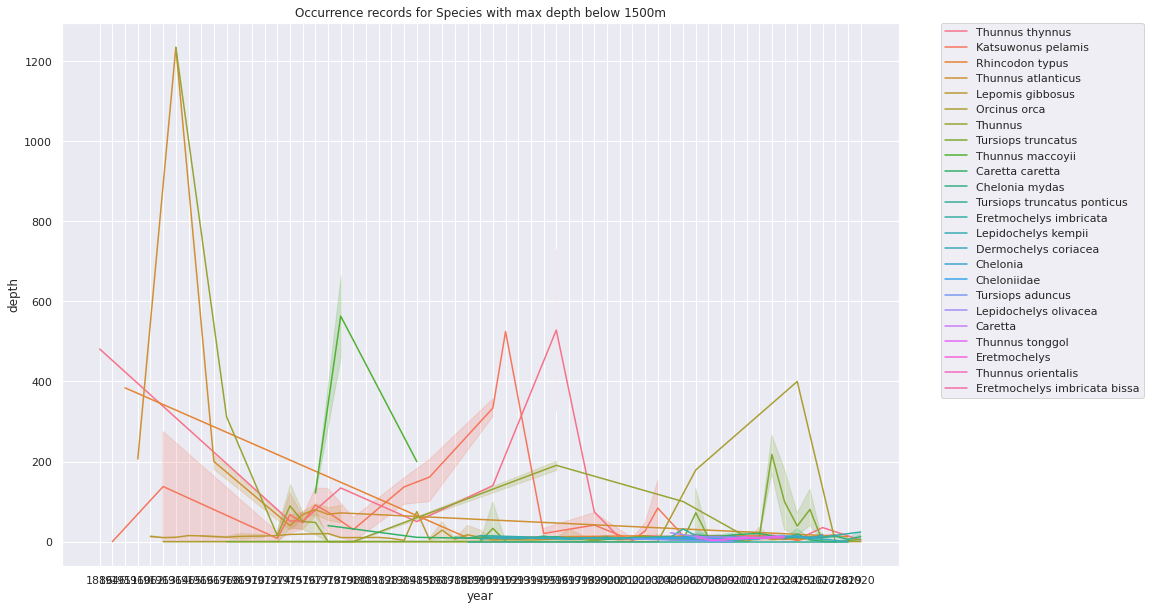

In [27]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})
dataDeriv = dataDeriv.sort_values(by="year")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"].isin(species_list)], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_title("Occurrence records for Species with max depth below 1500m");

From this graph, *Lepidechelys kempii* looks promising. Let us visualize its data.

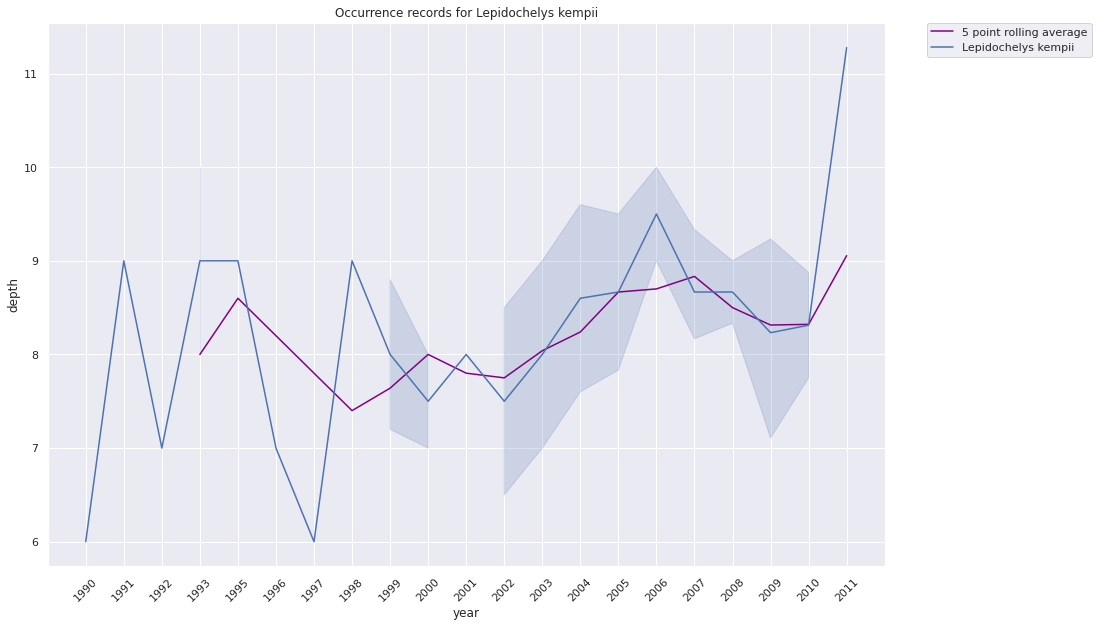

In [28]:
sns.set_style("darkgrid")
q = sns.lineplot(x=dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"].year, y=dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"].depth.rolling(5).mean(), label="5 point rolling average", data=dataDeriv,ci=None, color="purple")
p = sns.lineplot(data = dataDeriv[dataDeriv["scientificName"]=="Lepidochelys kempii"], x = "year", y = "depth", hue="scientificName")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
p.set_title("Occurrence records for Lepidochelys kempii");

We can clearly note following observations for *Lepidochelys kempii*:
+ The average depth has increased over the years, this means the species is looking for cooler waters to escape the heating waters.
+ The species has witnessed a slight compression, i.e. minimal and maximal depth have come closer. For a brief period it compressed significantly (around 2006) this might be due to data constraints or maybe some seasonal current. After that it has regained a lot but still the average difference in minimal and maximal depth is lower than early 2000s.

## Analysing depth trend for a number of species under the same `order`
The above data don't excite us so much to gather a complete picture of what is hapenning with organisms due to climate changes because the data is really scarce and has a lot of variance. 

Let us now diverge and analyze depths of all species under the same order because they might share some common trend in movement over time. For this we will pick up *Tetraodontiformes* order first - the order *Mola mola* and other *Molidae* are a part of. You can get [more information here on WoRMS](https://www.marinespecies.org/aphia.php?p=taxdetails&id=10332)

In [29]:
res = occ.search(taxonid=10332, startdepth=-1.0, startdate='1700-00-00') # let's set a start date to obtain non-nan records
tet_df = pd.DataFrame(res["results"])
tet_df


Fetched 213766 records.


,infraphylum,country,date_year,habitat,references,institutionID,scientificNameID,year,scientificName,individualCount,...,organismScope,identifiedByID,recordedByID,subspecies,subspeciesid,infraspecificEpithet,behavior,rights,taxonConceptID,identificationReferences
0,Gnathostomata,United States,2012,Forereef : AGR : Aggregate Reef,https://accession.nodc.noaa.gov/0162472. https...,ESD,urn:lsid:marinespecies.org:taxname:219879,2012,Melichthys vidua,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,United States,1988,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:309334,NaN,Stephanolepis hispida,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,Marshall Islands,1946,NaN,http://portal.vertnet.org/o/uwfc/adult-collect...,urn:lsid:biocol.org:col:34878,NaN,1946,Arothron nigropunctatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,Colombia,2017,NaN,NaN,ColombiaNIT:800250062-0,urn:lsid:marinespecies.org:taxname:127403,NaN,Diodon hystrix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,United States,1981,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:127409,1981,Stephanolepis hispida,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213761,Gnathostomata,NaN,1967,NaN,https://www.marine.csiro.au/data/caab/catch_da...,NaN,urn:lsid:marinespecies.org:taxname:275243,NaN,Diodon nicthemerus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213762,Gnathostomata,Australia,2007,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:219873,NaN,Abalistes stellatus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213763,Gnathostomata,Australia,1990,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:219969,NaN,Dicotylichthys punctulatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213764,Gnathostomata,United States,1986,NaN,NaN,NaN,NaN,NaN,Sphoeroides parvus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Whoa! we can see that for the whole order we have got 207,808 rows of data with depth records.

Let us first study the distribution of depth records over time before we jump into analysing the depth change.

In [30]:
tet_df["nYear"] = tet_df.eventDate.str[:4].astype(int)

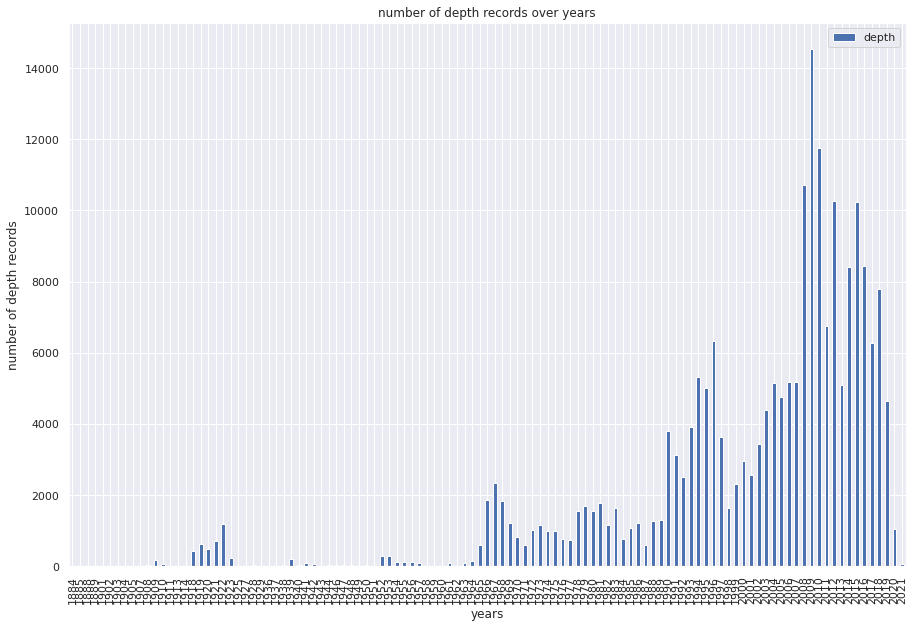

In [31]:
tet_df[["nYear","depth"]].groupby("nYear").count().plot.bar()
plt.xlabel("years")
plt.ylabel("number of depth records")
plt.title("number of depth records over years");

We can see that there is a huge variation in amount of data over years. There's a spike in the number around 2009, but since it has declined significantly. This high amount of variance might hurt us in our analysis.

But let us anyways do an analysis with the average depth of the order v/s time.

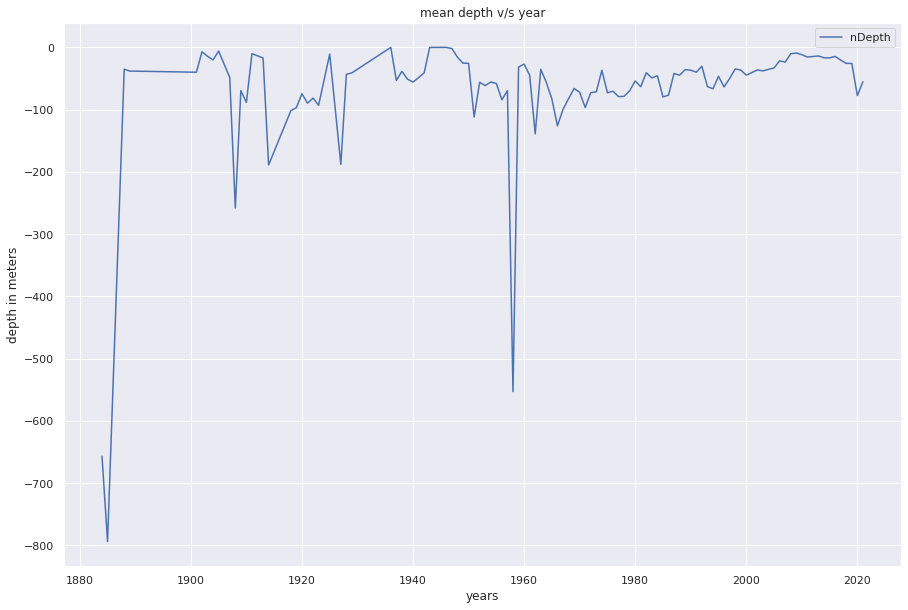

In [32]:
tet_df["nDepth"] = -tet_df["depth"]
tet_df[["nYear","nDepth"]].groupby("nYear").mean().plot()
plt.xlabel("years")
plt.ylabel("depth in meters")
plt.title("mean depth v/s year");

We can conclude three observations here:
+ There's a lot of variations in the data.
+ The period between 1910 to 1960 has a lot of variance therefore we can not land upon a firm understanding.
+ looking at the graph 1960 onwards, we can see that the average depth for this *order* has slightly reduced and species are moving towards the surface.

The high amount of variance makes it difficult for us to get over a strong conclusion.

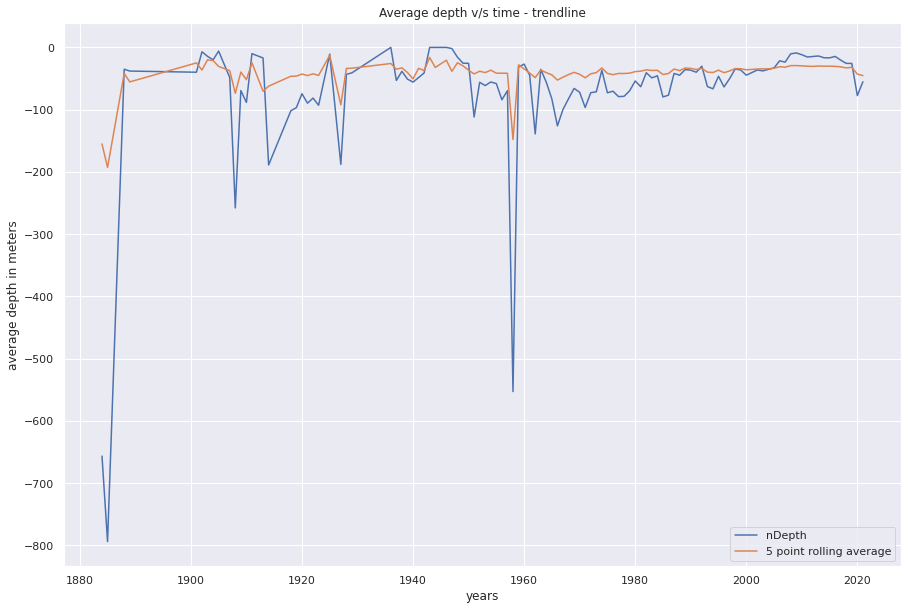

In [33]:
tet_df["nDepth"] = -tet_df["depth"]
tet_df[['nYear','nDepth']].groupby('nYear').mean().plot(label="average depth")
sns.lineplot(x=tet_df.nYear,y=tet_df[["nYear","nDepth"]].nDepth.rolling(5).mean(), ci=None, label="5 point rolling average")
plt.xlabel("years")
plt.ylabel("average depth in meters")
plt.title("Average depth v/s time - trendline");

From this plot we can barely make out that after 1960 the average depth has reduced slightly. We can figure this change when we zoom in the orange line which shows the 5 year rolling average.

## Analysing average deviation from mean for an `order`


We will now try to visualize and pick out trend of average deviation of species over time in an order.

In [34]:
res = occ.search(taxonid=10332, startdepth=-1.0, startdate='1965-00-00') # let's set a start date to obtain non-nan records
tet_df = pd.DataFrame(res["results"])
tet_df


Fetched 213766 records.


,infraphylum,country,date_year,habitat,references,institutionID,scientificNameID,year,scientificName,individualCount,...,organismScope,identifiedByID,recordedByID,subspecies,subspeciesid,infraspecificEpithet,behavior,rights,taxonConceptID,identificationReferences
0,Gnathostomata,United States,2012,Forereef : AGR : Aggregate Reef,https://accession.nodc.noaa.gov/0162472. https...,ESD,urn:lsid:marinespecies.org:taxname:219879,2012,Melichthys vidua,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,United States,1988,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:309334,NaN,Stephanolepis hispida,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,Marshall Islands,1946,NaN,http://portal.vertnet.org/o/uwfc/adult-collect...,urn:lsid:biocol.org:col:34878,NaN,1946,Arothron nigropunctatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,Colombia,2017,NaN,NaN,ColombiaNIT:800250062-0,urn:lsid:marinespecies.org:taxname:127403,NaN,Diodon hystrix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,United States,1981,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:127409,1981,Stephanolepis hispida,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213761,Gnathostomata,NaN,1967,NaN,https://www.marine.csiro.au/data/caab/catch_da...,NaN,urn:lsid:marinespecies.org:taxname:275243,NaN,Diodon nicthemerus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213762,Gnathostomata,Australia,2007,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:219873,NaN,Abalistes stellatus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213763,Gnathostomata,Australia,1990,NaN,NaN,NaN,urn:lsid:marinespecies.org:taxname:219969,NaN,Dicotylichthys punctulatus,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213764,Gnathostomata,United States,1986,NaN,NaN,NaN,NaN,NaN,Sphoeroides parvus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us first create an empty dataframe and we'll later fit in values.

In [35]:
_df = pd.DataFrame(index = tet_df.eventDate.str[:4].astype(int).unique(), columns=tet_df.scientificName.unique())
_df.sort_index(axis=0, inplace=True)

For the average deviation we will need to calculate year-wise mean depth for every species. We will use aggregate functions on this pandas dataframe to do this and later view what is the result.

In [36]:
tet_df["nYear"] = tet_df["eventDate"].str[:4].astype(int)
d_f = tet_df.groupby(["scientificName","nYear"]).depth.agg([np.mean, np.std])
d_f

mean        std
scientificName         nYear                       
Abalistes              1972    35.000000        NaN
Abalistes filamentosus 1975    90.000000   0.000000
                       1987    67.000000   0.000000
                       1988    69.000000        NaN
                       1989   137.500000  54.996364
...                                  ...        ...
Xanthichthys ringens   2015    23.500000   6.410928
                       2016    41.070000  16.246669
                       2017    38.000000        NaN
                       2018    23.538462   6.186213
                       2019    39.000000  20.784610

[6784 rows x 2 columns]

In [37]:
for sname, yData in d_f.groupby(level=0):
  for j in yData.droplevel(0).index:
    _df.at[j,sname] = yData.droplevel(0).at[j,"mean"]

In [38]:
_df

,Melichthys vidua,Stephanolepis hispida,Arothron nigropunctatus,Diodon hystrix,Canthigaster rostrata,Chilomycterus schoepfii,Sufflamen verres,Nelusetta ayraud,Sphoeroides spengleri,Melichthys niger,...,Takifugu vermicularis,Canthigaster rapaensis,Xanthichthys lima,Sufflamen albicaudatum,Abalistes,Aracana,Paramonacanthus arabicus,Kentrocapros eco,Sphoeroides lispus,Rhinecanthus cinereus
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,14.54653,NaN,8.320833,10.771429,13.644149,NaN,6.0,83.920792,8.46,11.815804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,12.354012,23.3,7.912088,10.915556,14.564343,NaN,15.333333,87.385417,7.85625,12.098697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,14.093067,NaN,NaN,10.170968,14.722217,NaN,15.5,64.818182,11.125,12.582403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,18.411765,NaN,NaN,22.2,31.5,NaN,23.75,121.554382,NaN,19.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we insert the mean of the depth for every species at the lowest row.

In [39]:
for k in _df.columns:
  _df.at[3000,k] = _df[k].mean()

We have so many NaNs in our data. To account for this we'll replace them with the mean since we are calculating deviations against mean, it won't affect our calculation much.

In [40]:
for k in _df.columns:
  _df[k].replace(to_replace=np.nan, value=_df.at[3000,k], inplace=True)

In [41]:
_df

,Melichthys vidua,Stephanolepis hispida,Arothron nigropunctatus,Diodon hystrix,Canthigaster rostrata,Chilomycterus schoepfii,Sufflamen verres,Nelusetta ayraud,Sphoeroides spengleri,Melichthys niger,...,Takifugu vermicularis,Canthigaster rapaensis,Xanthichthys lima,Sufflamen albicaudatum,Abalistes,Aracana,Paramonacanthus arabicus,Kentrocapros eco,Sphoeroides lispus,Rhinecanthus cinereus
1884,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,23.291056,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
1885,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,44.000000,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
1888,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,23.291056,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
1889,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,23.291056,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
1901,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,23.291056,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,12.354012,23.300000,7.912088,10.915556,14.564343,12.882233,15.333333,87.385417,7.856250,12.098697,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
2019,14.093067,38.748364,11.754247,10.170968,14.722217,12.882233,15.500000,64.818182,11.125000,12.582403,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
2020,18.411765,38.748364,11.754247,22.200000,31.500000,12.882233,23.750000,121.554382,23.291056,19.076923,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5
2021,14.618053,38.748364,11.754247,25.905668,52.276995,12.882233,15.921474,81.731379,23.291056,13.014893,...,117.0,2.0,152.5,18.592837,35.0,135.0,23.5,158.5,4.0,152.5


Now we will calculate the mean deviation of each species per year.

In [42]:
for i in _df.columns:
  _df.loc[1884:2021,i:i] = _df.loc[1884:2021,i:i] - _df.at[3000,i] # we saved our mean at this index

Now let us calculate the mean deviation for all species together in an year.

In [43]:
_df["all_mean"] = _df.mean(axis=1)

In [44]:
_df["all_mean"]

1884     2.978674
1885     9.767008
1888     0.075388
1889    -0.001313
1901    -0.125890
          ...    
2018    -3.237384
2019    -1.114947
2020    -1.501972
2021     0.068420
3000    81.655102
Name: all_mean, Length: 112, dtype: float64

Looks good so far. Let us now draw a plot, so as to sketch a trend.

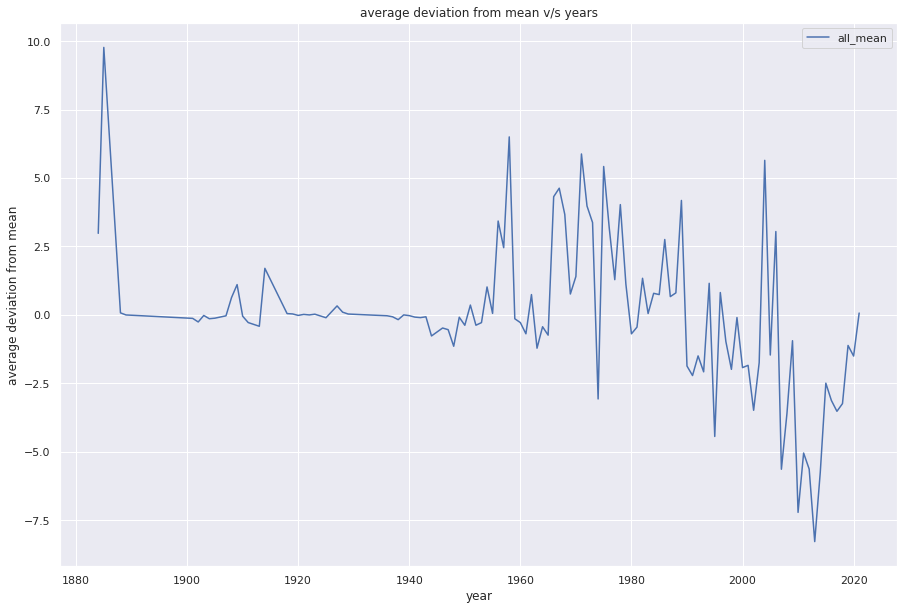

In [45]:
_df.loc[0:2999,"all_mean":"all_mean"].plot()
plt.ylabel("average deviation from mean")
plt.xlabel("year")
plt.title("average deviation from mean v/s years");

We can not strongly conclude a particular trend, there is a lot of deviation from the mean over the years particularly after 1950s. This might be due to the high number of NaNs present in the records.